In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import time
from utils import *
import seaborn as sns

import plotly.plotly as py
from plotly.graph_objs import *
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools

# import pandas_profiling
import datetime 
%matplotlib inline

# Load Data

In [4]:
phlilps = 'D:/03 Project/01 KKU MLMED/data/phlips'
capsule = 'D:/03 Project/01 KKU MLMED/data/capsule'
output = 'D:/02 Git/ml-med/data/output'

# merge_file(phlilps, capsule, output)

In [5]:
output = 'D:/02 Git/ml-med/data/output'
df = load_data_output(output)
# df.dataset_location.unique()

Loaded file D:/02 Git/ml-med/data/output\output_20171112.csv with rows: 41862 
Loaded file D:/02 Git/ml-med/data/output\output_20171113.csv with rows: 43823 
Loaded file D:/02 Git/ml-med/data/output\output_20171114.csv with rows: 46535 
Loaded file D:/02 Git/ml-med/data/output\output_20171115.csv with rows: 40041 
Loaded file D:/02 Git/ml-med/data/output\output_20171116.csv with rows: 42820 
Loaded file D:/02 Git/ml-med/data/output\output_20171117.csv with rows: 51323 
Loaded file D:/02 Git/ml-med/data/output\output_20171118.csv with rows: 44596 
Loaded file D:/02 Git/ml-med/data/output\output_20171119.csv with rows: 40829 
Loaded file D:/02 Git/ml-med/data/output\output_20171120.csv with rows: 37238 
Loaded file D:/02 Git/ml-med/data/output\output_20171121.csv with rows: 29825 
Loaded file D:/02 Git/ml-med/data/output\output_20171122.csv with rows: 18253 
Loaded file D:/02 Git/ml-med/data/output\output_20171123.csv with rows: 28285 
Loaded file D:/02 Git/ml-med/data/output\output_2017

In [6]:
col = ['SpO2', 'Inspired Tidal Volume', 'Mean Airway Pressure', 'Respiratory Rate']
df_1, features_delta = moving_trim_avg(df, col = col)

D:\02 Git\ml-med\utils.py:84: FutureWarning:

pd.rolling_quantile is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=600s,center=False,min_periods=0).quantile(quantile=0.1)

D:\02 Git\ml-med\utils.py:89: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=600s,min_periods=0,center=False).mean()



In [7]:
features_delta

['SpO2_change',
 'Inspired Tidal Volume_change',
 'Mean Airway Pressure_change',
 'Respiratory Rate_change']

In [11]:
data = check_y(df_1, delta_change=-3.0, start = 480, end = 600) 

D:\02 Git\ml-med\utils.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

D:\02 Git\ml-med\utils.py:175: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

D:\02 Git\ml-med\utils.py:176: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

D:\02 Git\ml-med\utils.py:177: SettingWithCopyWarning:


A value is trying to be set on 

Already created target(y)


In [12]:
data[data['y_flag'] == 1][['dataset_datetime', 'dataset_location', 'SpO2', 'SpO2_change', 'Inspired Tidal Volume', 'Inspired Tidal Volume_change', 'Mean Airway Pressure_change', 'Respiratory Rate_change']].head(20)

,dataset_datetime,dataset_location,SpO2,SpO2_change,Inspired Tidal Volume,Inspired Tidal Volume_change,Mean Airway Pressure_change,Respiratory Rate_change
26053,2018-01-02 20:32:00,MICU2-6FL-B1,99.0,0.800000,393.500000,3.057778,-0.223611,-1.662500
26054,2018-01-02 20:32:10,MICU2-6FL-B1,99.0,0.783333,363.000000,-25.883889,-0.715278,-2.095833
26055,2018-01-02 20:32:20,MICU2-6FL-B1,99.0,0.766667,311.250000,-72.843611,0.530556,-0.062500
26056,2018-01-02 20:32:30,MICU2-6FL-B1,99.0,0.766667,314.666667,-66.671389,-0.375000,0.929167
26057,2018-01-02 20:32:40,MICU2-6FL-B1,99.0,0.766667,306.333333,-72.926944,-0.036111,0.912500
26058,2018-01-02 20:32:50,MICU2-6FL-B1,99.0,0.750000,379.000000,0.106389,-0.686111,0.890278
26059,2018-01-02 20:33:00,MICU2-6FL-B1,99.0,0.733333,242.500000,-134.568611,-0.194444,1.356944
26060,2018-01-02 20:33:10,MICU2-6FL-B1,99.0,0.716667,314.250000,-62.756111,0.294444,1.818056
26061,2018-01-02 20:33:20,MICU2-6FL-B1,99.0,0.700000,273.000000,-99.681111,-0.197222,2.259722
26062,2018-01-02 20:33:30,MICU2-6FL-B1,99.0,0.683333,270.000000,-100.947778,0.302778,2.201389


In [26]:
cols = ['Respiratory Rate', 'Mean Airway Pressure', 'Inspired Tidal Volume', 'SpO2', 'Heart Rate', 'Extrinsic PEEP', 'Pulse Rate']
data1, features = create_features(data, t_before='300s', t_moving='180s', n_before = 6, cols = cols)
data1 = data1[data1['SpO2'].isnull() == False]
print(data1.groupby(['y_flag']).size())

Already created moving average features -------------------------------------------------------
Already created avg and sd of features at 0 secs before 
Already created avg and sd of features at 300 secs before 
Already created avg and sd of features at 600 secs before 
Already created avg and sd of features at 900 secs before 
Already created avg and sd of features at 1200 secs before 
Already created avg and sd of features at 1500 secs before 
y_flag
0    294978
1       683
dtype: int64


In [15]:
data1[data1['y_flag'] == 1].groupby(by = ['dataset_location']).size()

dataset_location
MICU2-6FL-B1     72
MICU2-6FL-B2     99
MICU2-6FL-B3     18
MICU2-6FL-B5    494
dtype: int64

In [16]:
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn import cross_validation, metrics
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score

from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pickle

C:\Users\AIE\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [17]:
def roc_auc(x_test, y_test):
    from sklearn.metrics import roc_curve, auc, roc_auc_score

    pred_prob = Model.predict_proba(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, thresholds, roc_auc

def roc_curve(fpr, tpr, thresholds, roc_auc):
    plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver operating characteristic', fontsize=18)
    plt.legend(loc="lower right", prop={'size': 14})

    # create the axis of thresholds (scores)
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
    ax2.set_ylabel('Threshold',color='r', fontsize=14)
    ax2.tick_params(labelsize = 12)
    ax2.set_ylim([thresholds[-1],thresholds[0]])
    ax2.set_xlim([fpr[0],fpr[-1]])

    plt.show()
    plt.savefig('roc_and_threshold.png')
    plt.close()

In [27]:
def roc_curve(x_test, y_test):
    
    from sklearn.metrics import roc_curve, auc, roc_auc_score

    pred_prob = Model.predict_proba(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver operating characteristic', fontsize=18)
    plt.legend(loc="lower right", prop={'size': 14})

    # create the axis of thresholds (scores)
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
    ax2.set_ylabel('Threshold',color='r', fontsize=14)
    ax2.tick_params(labelsize = 12)
    ax2.set_ylim([thresholds[-1],thresholds[0]])
    ax2.set_xlim([fpr[0],fpr[-1]])

    plt.show()
    plt.savefig('roc_and_threshold.png')
    plt.close()

In [28]:
path = 'D:/02 Git/ml-med'

def under_sampling(labels, p):
    negative_idx = np.random.choice(np.where(labels == 0)[0], size=int(len(labels)*p), replace=False)
    positive_idx = np.where(labels==1)[0]
    return np.concatenate([negative_idx, positive_idx])

def model(train_data, test_data, features, early_stopping = 10, undersamp_ratio = 0.5):
    
    x_train = train_data[features].as_matrix()
    y_train = train_data['y_flag'].as_matrix()
    
    x_test = test_data[features].as_matrix()
    y_test = test_data['y_flag'].as_matrix()
    
    # undersampling
    resampled_idx = under_sampling(y_train, undersamp_ratio)
    x_resampled, y_resampled = x_train[resampled_idx], y_train[resampled_idx]

    # oversampling
    sm = SMOTE(random_state = 12, ratio = 0.5)
    x_train, y_train = sm.fit_sample(x_resampled, y_resampled)
    print('before oversampling : ', np.bincount(y_resampled))
    print('after oversampling : ', np.bincount(y_train))
    
    # training dataset and validation dataset
#     TrainTest = StratifiedShuffleSplit(n_splits = 1, test_size = 0.1, random_state = 42)
#     for train_index, test_index in TrainTest.split(x_train, y_train):
#         print("TRAIN:", train_index, "TEST:", test_index)
#         x_training, x_validation = x_train[train_index], x_train[test_index]
#         y_training, y_validation = y_train[train_index], y_train[test_index]
#         print('y_training : ', np.bincount(y_training))
#         print('y_validation : ', np.bincount(y_validation))
    
    # fit Model
    Model = XGBClassifier()
    eval_set = [(x_train, y_train), (x_test, y_test)]
    (Model.fit(x_train, y_train
               , early_stopping_rounds = early_stopping
               , eval_metric = ["auc"]
               , eval_set = eval_set
#                , n_estimators = 1000
               , verbose = True)
    )
    
    # predict
    print(Model)
    y_predict = Model.predict(x_test)
    prediction = [round(value) for value in y_predict]

    y_predprob = Model.predict_proba(x_test)
    
    print("AUC Score (test): %f" %(metrics.roc_auc_score(y_test, prediction)))
    
    importance_frame = pd.DataFrame({'Importance': list(Model.feature_importances_), 'Feature': list(features)})
    importance_frame.sort_values(by = 'Importance', inplace = True)
    importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'orange')
    return x_test, y_test, prediction, Model
    

In [30]:
features.extend(features_delta)
auc = []
for i in range(1, 3):
    
    import random
    location_test = [list(data1['dataset_location'])[i] for i in sorted(random.sample(range(len(data1['dataset_location'])), 2)) ]
    print('location for test %s' %location_test)

    train_data = data1[~data1.dataset_location.isin(location_test)]
    test_data = data1[data1.dataset_location.isin(location_test)]
    print("[y=1/train : %d/%d = %f] [y=1/test : %d/%d = %f]" %(len(train_data[train_data['y_flag'] == 1]), len(train_data), len(train_data[train_data['y_flag'] == 1])/len(train_data), len(test_data[test_data['y_flag'] == 1]), len(test_data), len(test_data[test_data['y_flag'] == 1])/len(test_data)))
    
    x_test, y_test, prediction, Model = model(train_data, test_data, features, early_stopping = 50, undersamp_ratio = 0.5)
#     fpr, tpr, thresholds, roc_auc = roc_auc(x_test, y_test)
#     roc_curve(fpr, tpr, thresholds, roc_auc)
#     auc.append(roc_auc)
    roc_curve(x_test, y_test)
    print("-----------------------------------------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------------------------------------")

location for test ['MICU2-6FL-B1', 'MICU2-6FL-B1']
[y=1/train : 611/213902 = 0.002856] [y=1/test : 72/81759 = 0.000881]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [32]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
pred_prob = Model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

In [33]:
roc_auc

0.5114692762200993

__Test__

In [5]:
mean1 = df[df['dataset_location'] == 'MICU2-6FL-B1'].groupby(['dataset_location'])['ABPm'].rolling('900s').mean().reset_index()
max1 = df[df['dataset_location'] == 'MICU2-6FL-B1'].groupby(['dataset_location'])['ABPm'].rolling('900s').max().reset_index()
min1 = df[df['dataset_location'] == 'MICU2-6FL-B1'].groupby(['dataset_location'])['ABPm'].rolling('900s').min().reset_index()
mock_data = pd.merge(mean1, max1, how = 'left', on = ['dataset_datetime', 'dataset_location'])
mock_data = pd.merge(mock_data, min1, how = 'left', on = ['dataset_datetime', 'dataset_location'])

ValueError: window must be an integer

In [4]:
mock_data = mock_data[(mock_data['ABPm_x'].isnull() == False) & (mock_data['ABPm_y'].isnull() == False) & (mock_data['ABPm'].isnull() == False) & (mock_data['ABPm'] > 0)].head(10)
mock_data.head(2)

NameError: name 'mock_data' is not defined

In [239]:
mean1 = pd.DataFrame(df[df['dataset_location'] == 'MICU2-6FL-B1'].groupby(pd.TimeGrouper(freq = '15Min'))['ABPm'].mean().reset_index())
max1 = pd.DataFrame(df[df['dataset_location'] == 'MICU2-6FL-B1'].groupby(pd.TimeGrouper(freq = '15Min'))['ABPm'].max().reset_index())
min1 = pd.DataFrame(df[df['dataset_location'] == 'MICU2-6FL-B1'].groupby(pd.TimeGrouper(freq = '15Min'))['ABPm'].min().reset_index())
mock_data = pd.merge(mean1, max1, how = 'left', on = ['dataset_datetime'])
mock_data = pd.merge(mock_data, min1, how = 'left', on = ['dataset_datetime'])

In [243]:
mock_data = mock_data[(mock_data['ABPm_x'].isnull() == False) & (mock_data['ABPm_y'].isnull() == False) & (mock_data['ABPm'].isnull() == False) & (mock_data['ABPm'] > 0)].head(20)
mock_data.to_json()

'{"dataset_datetime":{"4843":1514806200000,"4844":1514807100000,"4845":1514808000000,"4847":1514809800000,"4848":1514810700000,"4849":1514811600000,"4850":1514812500000,"4851":1514813400000,"4852":1514814300000,"4853":1514815200000},"ABPm_x":{"4843":77.54,"4844":78.5056179775,"4845":77.8705882353,"4847":79.2272727273,"4848":83.2380952381,"4849":89.9518072289,"4850":91.1445783133,"4851":90.3,"4852":88.3333333333,"4853":85.6555555556},"ABPm_y":{"4843":81.0,"4844":80.0,"4845":93.0,"4847":82.0,"4848":107.0,"4849":103.0,"4850":151.0,"4851":93.0,"4852":92.0,"4853":91.0},"ABPm":{"4843":74.0,"4844":76.0,"4845":72.0,"4847":76.0,"4848":67.0,"4849":80.0,"4850":81.0,"4851":88.0,"4852":86.0,"4853":70.0}}'

In [222]:
df.index = df['dataset_datetime']
rolling_mean = df.groupby('dataset_location')['SpO2'].rolling('180s').mean().reset_index()
test = df.groupby('dataset_location')['SpO2'].rolling_apply(tr)

AttributeError: 'SeriesGroupBy' object has no attribute 'rolling_apply'

In [104]:
import operator
data2 = data.copy()
col = list(data2.columns)

CheckNull = {}
CheckZero = {}
for i, col in enumerate(col):
    CheckNull[col] = data2[col].isnull().sum()/len(data2[col])
#     data2[col] = data2[col].astype(int)
#     CheckZero[col] = len(data2[data2[col] == 0])/len(data2[col])
a = sorted(CheckNull.items(), key=operator.itemgetter(1), reverse=False)
pd.DataFrame(a).to_csv('features.csv')

In [138]:
data2[['Inspired O2 (Ventilator)']]

,Inspired Minute Volume (Total),Minute Volume (Spontaneous)
0,10.500000,0.0
1,10.500000,0.0
2,10.500000,0.0
3,10.500000,0.0
4,10.500000,0.0
5,10.500000,0.0
6,10.500000,0.0
7,10.500000,0.0
8,10.500000,0.0
9,10.500000,0.0


In [ ]:
sorted(CheckNull.items(), key=operator.itemgetter(1), reverse=False)

# Checking Y

In [10]:
data = check_y(df, delta_change=-3.0, start = 560, end = 600) 

D:\02 Git\ml-med\utils.py:151: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

D:\02 Git\ml-med\utils.py:152: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

D:\02 Git\ml-med\utils.py:153: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

D:\02 Git\ml-med\utils.py:154: SettingWithCopyWarning:


A value is trying to be set on 

Already created target(y)


In [57]:
data.columns

Index(['ABPd', 'ABPm', 'ABPs', 'Airway Resistance', 'Alarm Silence Status',
       'Apnea Ventilation Delay Setting', 'Breathing Circuit Compliance',
       'Breathing Circuit Leak', 'CVPm', 'Disconnect Time Setting',
       'Dynamic Compliance', 'Expiratory Component of I:E Ratio Setting',
       'Expired Minute Volume', 'Expired O2', 'Expired Tidal Volume',
       'Expired Tidal Volume Lower Alarm Limit',
       'Expired Tidal Volume Upper Alarm Limit', 'Extrinsic PEEP',
       'Extrinsic PEEP Lower Alarm Limit', 'Extrinsic PEEP Upper Alarm Limit',
       'FiO2 Setting', 'Flow Trigger Setting', 'Heart Rate',
       'Inspiratory Component of I:E Ratio Setting',
       'Inspiratory Time Setting', 'Inspired Minute Volume (Total)',
       'Inspired O2 (FiO2)', 'Inspired O2 (Ventilator)',
       'Inspired Pressure Setting', 'Inspired Tidal Volume',
       'Intrinsic PEEP Upper Alarm Limit', 'Leakage (ventilator)',
       'Maximum Positive Airway Pressure', 'Mean Airway Pressure',
       '

In [147]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools


location = 'MICU2-6FL-B1'
df_locat = data[data['dataset_location'] == location].copy()
df_locat['y_value_1'] = np.where(df_locat['y_flag'] == 1, df_locat['SpO2'], float('nan') )

traces = []

for i, col in enumerate(['SpO2', 'SpO2_moving_avg']):
    traces.append(go.Scatter(
                    x = df_locat.dataset_datetime,
                    y = df_locat[col],
                    mode = 'lines',
                    name = col
                    ))
    
traces.append(go.Scatter(
            x = df_locat.dataset_datetime,
            y = df_locat.y_value_1,
            mode = 'markers',
            marker = dict(color = 'rgb(255,0,0)'),
            name = "'y'"
            ))


fig = go.Figure(data = traces) # , layout = layout
plot(fig, filename = location + '.html')

'file://D:\\02 Git\\ml-med\\MICU2-6FL-B1.html'

In [12]:
cols = ['Respiratory Rate', 'Mean Airway Pressure', 'Inspired Tidal Volume', 'SpO2', 'Heart Rate', 'Extrinsic PEEP', 'Pulse Rate']
data1, features = create_features(data, t_moving='180s', n_before = 3, cols = cols)
data1 = data1[data1['SpO2'].isnull() == False]
print(data1.groupby(['y_flag']).size())

Already created moving average features -------------------------------------------------------
Already created avg and sd of features at 0 secs before 
Already created avg and sd of features at 600 secs before 
Already created avg and sd of features at 1200 secs before 
y_flag
0    313042
1       402
dtype: int64


In [11]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools


location = 'MICU2-6FL-B1'
df_locat = data_2[data_2['dataset_location'] == location].copy()
df_locat['y_value_1'] = np.where(df_locat['y_value'] == 1, df_locat['SpO2'], float('nan') )
df_locat['y_value_2'] = np.where(df_locat['y_cut_flag'] == 'cut', df_locat['SpO2'], float('nan') )

traces = []

for i, col in enumerate(['SpO2', 'SpO2_moving_mean_avg', 'SpO2_mean0s', 'SpO2_mean600s']):
    traces.append(go.Scatter(
                    x = df_locat.dataset_datetime,
                    y = df_locat[col],
                    mode = 'lines',
                    name = col
                    ))
    
traces.append(go.Scatter(
            x = df_locat.dataset_datetime,
            y = df_locat.y_value_1,
            mode = 'markers',
            marker = dict(color = 'rgb(255,0,0)'),
            name = "'y'"
            ))
traces.append(go.Scatter(
            x = df_locat.dataset_datetime,
            y = df_locat.y_value_2,
            mode = 'markers',
            marker = dict(color = 'rgb(0,0,255)'),
            name = "'y'"
            ))



fig = go.Figure(data = traces) # , layout = layout
plot(fig, filename = location + '.html')

'file://D:\\04 Git\\ml-med\\MICU2-6FL-B1.html'

# Model

In [25]:
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import cross_validation, metrics

from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pickle

### divide by location

In [15]:
data1[data1['y_flag'] == 1].groupby(by = ['dataset_location']).size()

dataset_location
MICU2-6FL-B1     72
MICU2-6FL-B2    109
MICU2-6FL-B3     12
MICU2-6FL-B5    615
MICU2-6FL-B8     12
dtype: int64

In [16]:
import random
location_test = [list(data1['dataset_location'])[i] for i in sorted(random.sample(range(len(data1['dataset_location'])), 1)) ]
print('location for test %s' %location_test)

train_data = data1[~data1.dataset_location.isin(location_test)]
test_data = data1[data1.dataset_location.isin(location_test)]
print("[y=1/train : %d/%d = %f] [y=1/test : %d/%d = %f]" %(len(train_data[train_data['y_flag'] == 1]), len(train_data), len(train_data[train_data['y_flag'] == 1])/len(train_data), len(test_data[test_data['y_flag'] == 1]), len(test_data), len(test_data[test_data['y_flag'] == 1])/len(test_data)))

location for test ['MICU2-6FL-B3']
[y=1/train : 808/280919 = 0.002876] [y=1/test : 12/34085 = 0.000352]


In [17]:
def roc_curve(x_test, y_test):
    from sklearn.metrics import roc_curve, auc, roc_auc_score

    pred_prob = Model.predict_proba(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver operating characteristic', fontsize=18)
    plt.legend(loc="lower right", prop={'size': 14})

    # create the axis of thresholds (scores)
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
    ax2.set_ylabel('Threshold',color='r', fontsize=14)
    ax2.tick_params(labelsize = 12)
    ax2.set_ylim([thresholds[-1],thresholds[0]])
    ax2.set_xlim([fpr[0],fpr[-1]])

    plt.show()
    plt.savefig('roc_and_threshold.png')
    plt.close()

C:\Users\AIE\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.



before oversampling :  [140459    808]
after oversampling :  [140459  70229]
TRAIN: [  5465  57686 198183 ..., 204035 101591 157560] TEST: [ 92561 183350  94018 ...,  75945 126205 190441]
y_training :  [126413  63206]
y_validation :  [14046  7023]
[0]	validation_0-auc:0.676377	validation_1-auc:0.493103
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.681557	validation_1-auc:0.492824
[2]	validation_0-auc:0.681569	validation_1-auc:0.492795
[3]	validation_0-auc:0.681682	validation_1-auc:0.492795
[4]	validation_0-auc:0.684388	validation_1-auc:0.492369
[5]	validation_0-auc:0.686528	validation_1-auc:0.4919
[6]	validation_0-auc:0.693741	validation_1-auc:0.491812
[7]	validation_0-auc:0.693863	validation_1-auc:0.491812
[8]	validation_0-auc:0.694887	validation_1-auc:0.491782
[9]	validation_0-auc:0.694907	validation_1-auc:0.491782
[10]	validation_0-auc:0.695092	valida

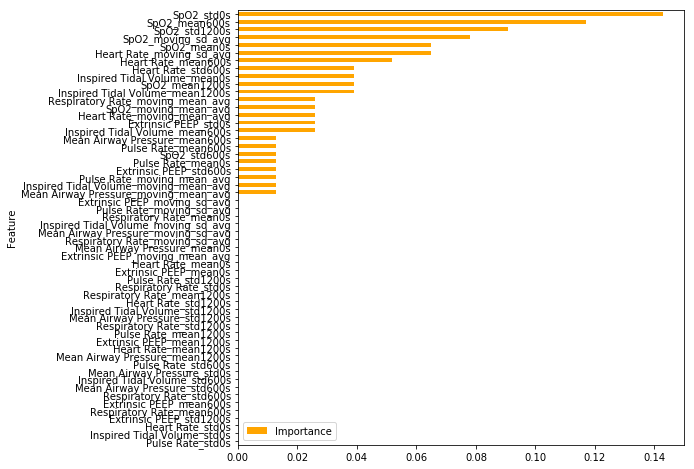

In [18]:
path = 'D:/02 Git/ml-med'

def under_sampling(labels, p):
    negative_idx = np.random.choice(np.where(labels == 0)[0], size=int(len(labels)*p), replace=False)
    positive_idx = np.where(labels==1)[0]
    return np.concatenate([negative_idx, positive_idx])

def model(train_data, test_data, features, early_stopping = 10, undersamp_ratio = 0.5):
    
    x_train = train_data[features].as_matrix()
    y_train = train_data['y_flag'].as_matrix()
    
    x_test = test_data[features].as_matrix()
    y_test = test_data['y_flag'].as_matrix()
    
    # undersampling
    resampled_idx = under_sampling(y_train, undersamp_ratio)
    x_resampled, y_resampled = x_train[resampled_idx], y_train[resampled_idx]

    # oversampling
    sm = SMOTE(random_state = 12, ratio = 0.5)
    x_train, y_train = sm.fit_sample(x_resampled, y_resampled)
    print('before oversampling : ', np.bincount(y_resampled))
    print('after oversampling : ', np.bincount(y_train))
    
    # training dataset and validation dataset
    TrainTest = StratifiedShuffleSplit(n_splits = 1, test_size = 0.1, random_state = 42)
    for train_index, test_index in TrainTest.split(x_train, y_train):
        print("TRAIN:", train_index, "TEST:", test_index)
        x_training, x_validation = x_train[train_index], x_train[test_index]
        y_training, y_validation = y_train[train_index], y_train[test_index]
        print('y_training : ', np.bincount(y_training))
        print('y_validation : ', np.bincount(y_validation))
    
    # fit Model
    Model = XGBClassifier()
    eval_set = [(x_training, y_training), (x_test, y_test)]
    (Model.fit(x_resampled, y_resampled
               , early_stopping_rounds = early_stopping
               , eval_metric = ["auc"]
               , eval_set = eval_set
               , verbose = True)
    )
    
    # predict
    print(Model)
    y_predict = Model.predict(x_test)
    prediction = [round(value) for value in y_predict]

    y_predprob = Model.predict_proba(x_test)
    
    print("AUC Score (test): %f" %(metrics.roc_auc_score(y_test, prediction)))
    
    importance_frame = pd.DataFrame({'Importance': list(Model.feature_importances_), 'Feature': list(features)})
    importance_frame.sort_values(by = 'Importance', inplace = True)
    importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'orange')
    return x_test, y_test, prediction, Model
    

x_test, y_test, prediction, Model = model(train_data, test_data, features)

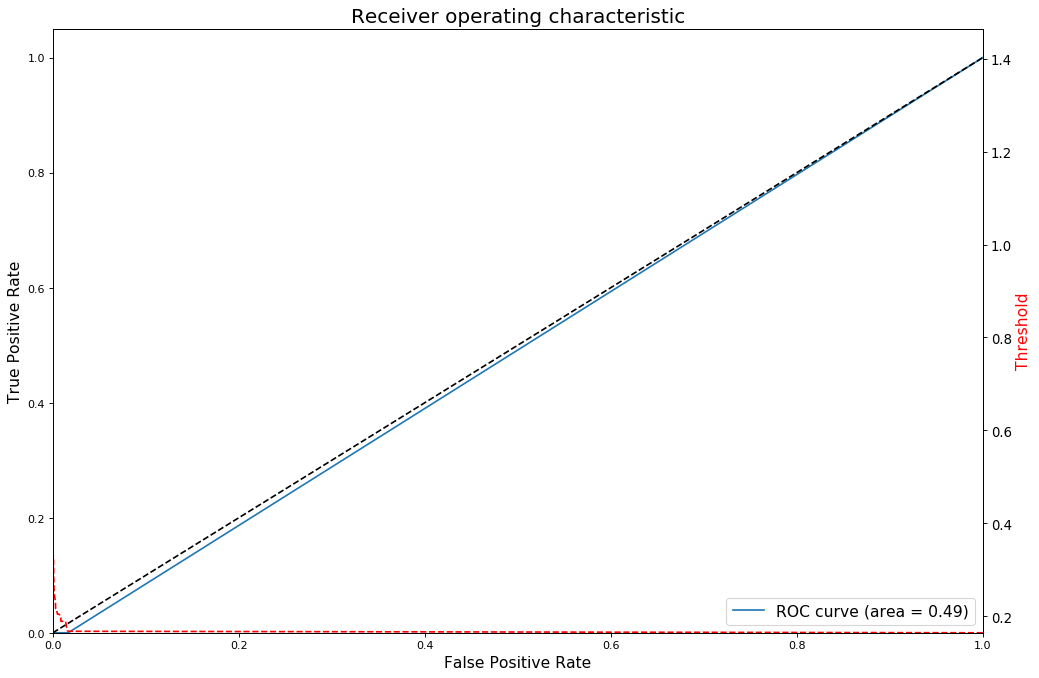

In [19]:
roc_curve(x_test, y_test)

In [55]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

Average precision-recall score: 0.00


Text(0.5,1,'2-class Precision-Recall curve: AP=0.00')

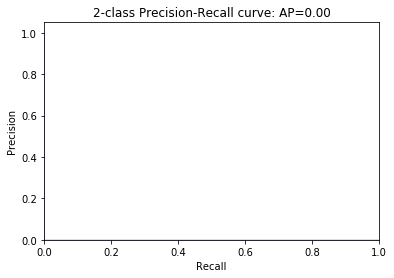

In [53]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, prediction)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [61]:
path = 'D:/02 Git/ml-med'
undersamp_ratio = 0.1
num_round = 10

x_train = train_data[features].as_matrix()
y_train = train_data['y_flag'].as_matrix()
x_test = test_data[features].as_matrix()
y_test = test_data['y_flag'].as_matrix()


def under_sampling(labels, p):
    negative_idx = np.random.choice(np.where(labels == 0)[0], size=int(len(labels)*p), replace=False)
    positive_idx = np.where(labels==1)[0]
    return np.concatenate([negative_idx, positive_idx])

resampled_idx = under_sampling(y_train, undersamp_ratio)
x_resampled, y_resampled = x_train[resampled_idx], y_train[resampled_idx]


seed = 42
early_stop = 10

Model = XGBClassifier()
eval_set = [(x_train, y_train), (x_test, y_test)]
(Model.fit(x_resampled, y_resampled, early_stopping_rounds = early_stop
           , eval_metric = ["auc"], eval_set = eval_set, verbose = True, reg_alpha = 0.1))
print(Model)
y_pred = Model.predict(x_test)
prediction = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: %.2f%%" %(accuracy * 100.0))
    
results = Model.evals_result()
epochs = len(results['validation_0']['auc'])
pickle.dump(Model, open(path + '/Model.model', 'wb'))

TypeError: fit() got an unexpected keyword argument 'reg_alpha'

In [ ]:
Model = XGBClassifier()
Model.fit(num_round)

In [203]:
feature_imp = pd.DataFrame({"imp": Model.feature_importances_,"col": features})
feature_imp = feature_imp.sort_values("imp", ascending=False)
feature_imp.to_csv('feature_imp.csv')

In [204]:
feature_imp

,col,imp
28,Respiratory Rate_mean600s,0.051084
51,Inspired Tidal Volume_std1200s,0.047988
10,SpO2_moving_sd_avg,0.043344
24,SpO2_std0s,0.043344
32,Heart Rate_mean600s,0.038700
19,Extrinsic PEEP_mean0s,0.038700
37,Inspired Tidal Volume_std600s,0.038700
39,Heart Rate_std600s,0.035604
30,Inspired Tidal Volume_mean600s,0.034056
52,SpO2_std1200s,0.029412


### divide by shuffle

In [113]:
x_data = data1[features].as_matrix()
y_data = data1['y_flag'].as_matrix()

In [114]:
import pickle
def under_sampling(labels, p):
    negative_idx = np.random.choice(np.where(labels == 0)[0], size=int(len(labels)*p), replace=False)
    positive_idx = np.where(labels==1)[0]
    return np.concatenate([negative_idx, positive_idx])

n_split = 3
test_size = 0.25
validate_size = 0.15
seed = 42
TrainTest = StratifiedShuffleSplit(n_splits = n_split, test_size = test_size, random_state = seed)
# TrainValidation = StratifiedShuffleSplit(n_splits = 1, test_size = validate_size, random_state = seed)
path = 'D:/04 Git/ml-med'
undersamp_ratio = 0.2
early_stop = 10
print(TrainTest)
n = 1
auc = []

for train_index, test_index in TrainTest.split(x_data, y_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    print("Already spilt data --------------------------------------------------------------------------")
    
    resampled_idx = under_sampling(y_train, undersamp_ratio)
    x_resampled, y_resampled = x_train[resampled_idx], y_train[resampled_idx]
    print("Already under-sampling data for label = 0 ---------------------------------------------------")
    
    if n == 1:
        print("-----------------------")
        print("Initial Model")
        print("-----------------------")
        Model = XGBClassifier()
    else:
        print("-----------------------")
        print("Train Model # %d" %n)
        print("-----------------------")
        Model = pickle.load(open(path + '/Model.model', 'rb'))
    eval_set = [(x_train, y_train), (x_test, y_test)]
    Model.fit(x_resampled, y_resampled, early_stopping_rounds = early_stop, eval_metric = ["auc"], eval_set = eval_set, verbose = True)
    print(Model)
    y_pred = Model.predict(x_test)
    prediction = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, prediction)
    print("Accuracy: %.2f%%" %(accuracy * 100.0))
    
    results = Model.evals_result()
    epochs = len(results['validation_0']['auc'])
    auc.append(results)
    
    pickle.dump(Model, open(path + '/Model.model', 'wb'))
    #Model.save_model('Model.model')
    n = n+1
    print("")

StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.25,
            train_size=None)
TRAIN: [137404 193475   3071 ...,  55417 121762 184782] TEST: [124434  79384 147046 ..., 219666   3249 296879]
Already spilt data --------------------------------------------------------------------------
Already under-sampling data for label = 0 ---------------------------------------------------
-----------------------
Initial Model
-----------------------
[0]	validation_0-auc:0.636199	validation_1-auc:0.629655
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.709778	validation_1-auc:0.704734
[2]	validation_0-auc:0.739793	validation_1-auc:0.733236
[3]	validation_0-auc:0.768389	validation_1-auc:0.762599
[4]	validation_0-auc:0.779428	validation_1-auc:0.773059
[5]	validation_0-auc:0.785227	validation_1-auc:0.779043
[6]	validation_0-auc:0.789005	validation_1-auc:0.

AttributeError: 'XGBClassifier' object has no attribute 'save_model'

In [160]:
feature_imp = pd.DataFrame({"imp": Model.feature_importances_,"col": features})
feature_imp = feature_imp.sort_values("imp", ascending=False)
feature_imp = feature_imp.reset_index()
feature_imp.to_csv(path + '/feature_imp.csv')

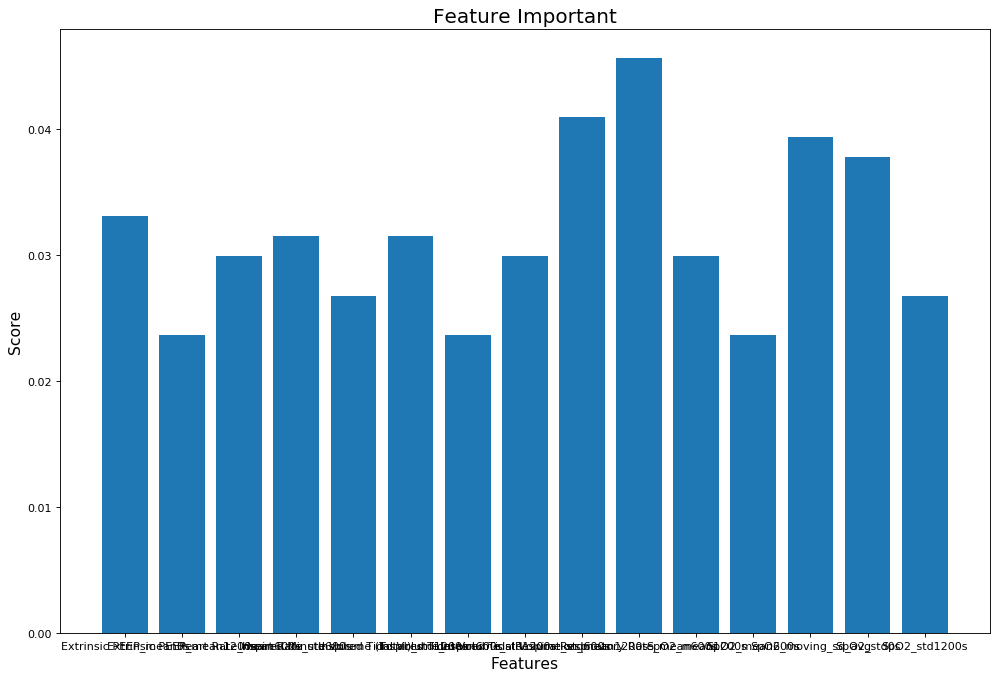

In [173]:
import matplotlib.pyplot as pyplot
fig = pyplot.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
pyplot.bar(feature_imp['col'][:15], feature_imp['imp'][:15])
ax.set_title('Feature Important', fontsize=18)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Score', fontsize=14)
ax.get_autoscale_on()
pyplot.show()

In [159]:
plot_importance(Model)

NameError: name 'plot_importance' is not defined

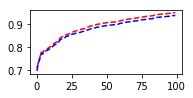

In [45]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(0, len(auc)):
    xaxis = range(0, len(auc[i]['validation_0']['auc']))
    plt.subplot(321+i)
    plt.plot(xaxis, auc[i]['validation_0']['auc'], 'r--', xaxis, auc[i]['validation_1']['auc'], 'b--')
    plt.show()
    
plt.figure(figsize=(20,29))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)

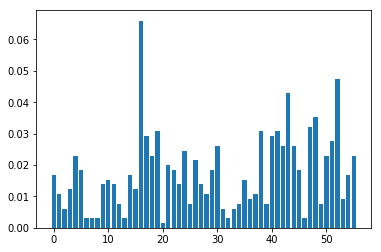

In [74]:
import matplotlib.pyplot as pyplot
pyplot.bar(range(len(Model.feature_importances_)), Model.feature_importances_)
pyplot.show()

### Tuning parameters